## Acquire

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import acquire


from sklearn.model_selection import train_test_split
from env import host, password, user 

def get_db_url(user, password, host, db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'   


**1.  Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, ```df_iris```, from this data.**

In [50]:
df_iris = sns.load_dataset('iris')

* print the first 3 rows

In [51]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


* print the number of rows and columns (shape)

In [52]:
df_iris.shape

(150, 5)

* print the column names

In [53]:
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

* print the data type of each column


In [54]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [55]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [56]:
stats = df_iris.describe().T #.t is used to transpose rows and columns, not necessary
stats
# recommend changing the species name from string to numerical data

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


**2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.**

In [57]:
df_excel = pd.read_csv('Table1_CustDetails.csv')

* assign the first 100 rows to a new dataframe, df_excel_sample


In [58]:
df_excel_sample = df_excel.sample(n=100,axis = 0)

df_excel_sample.shape

(100, 12)

* print the number of rows of your original dataframe


In [59]:
df_excel.shape[0]

7049

* print the first 5 column names


In [60]:
columns = list(df_excel.columns.values.tolist())
print(columns[0:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']


* print the column names that have a data type of object


In [61]:
object_columns = df_excel.select_dtypes('object')
print(list(object_columns))


['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']


* compute the range for each of the numeric variables.

In [62]:
variables = df_excel.select_dtypes(exclude = 'object')
print(list(variables))



['is_senior_citizen', 'phone_service', 'internet_service', 'contract_type', 'monthly_charges', 'total_charges']


In [63]:
df_variables = df_excel.select_dtypes(exclude = 'object')
df_variables.min(), df_variables.max()

(is_senior_citizen     0.00
 phone_service         0.00
 internet_service      0.00
 contract_type         0.00
 monthly_charges      18.25
 total_charges        18.80
 dtype: float64,
 is_senior_citizen       1.00
 phone_service           2.00
 internet_service        2.00
 contract_type           2.00
 monthly_charges       118.75
 total_charges        8684.80
 dtype: float64)

3. **Read the data from this google sheet into a dataframe, ```df_google```**


In [64]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

# Use the replace method to modify our Google Sheet share url to be a csv export url.

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [65]:
# Use read_csv() method to create our DataFrame.

df_google = pd.read_csv(csv_export_url)


* **print the first 3 rows**


In [66]:
df_google = pd.read_csv('train.csv')
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* **print the number of rows and columns**


In [67]:
df_google.shape

(891, 12)

* **print the column names**


In [68]:
columns = list(df_google.columns.values.tolist())
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


* **print the data type of each column**


In [69]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* **print the summary statistics for each of the numeric variables**


In [71]:
df_numeric = df_google.select_dtypes(exclude = 'object')
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* **print the unique values for each of your categorical variables**

In [72]:
df_object = df_google.select_dtypes('object')
df_object.nunique(0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [73]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [74]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [75]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [76]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

## Prepare

**The end product of this exercise should be the specified functions in a python script named ```prepare.py```. Do these in your ```classification_exercises.ipynb``` first, then transfer to the ```prepare.py file```.**


**Using the Iris Data:**

1. Use the function defined in ```acquire.py``` to load the iris data.


In [77]:
import pandas as pd
from env import host, password, user 

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

from acquire import get_iris_data
import os


df_iris = get_iris_data()
df_iris.head(2)


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1


2. Drop the ```species_id``` and ```measurement_id``` columns.



In [78]:
df_iris.drop(columns=['species_id', 'measurement_id'], inplace=True)
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


3. Rename the ```species_name``` column to just ```species```.


In [79]:
df_iris.rename(columns={'species_name': 'species'}, inplace = True)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
df_iris.drop_duplicates(keep='first', inplace=True)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


4. Create dummy variables of the species name.


In [81]:
dummies = pd.get_dummies(df_iris[['species']])

df_iris = pd.concat([df_iris, dummies], axis=1)
df_iris.head()

dummies

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


5. Create a function named ```prep_iris``` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [37]:
def clean_iris():
    '''
    clean_iris will take one argument, an acquired df, anticipated to be
    the iris dataset -- and will 
    remove species_id and measurement_id columns, 
    rename species_name to species,
    encode the species name into two new columns
    
    return a single pandas dataframe with the above operations performed
    '''
    drop(columns=['species_id', 'measurement_id'], inplace=True)
    df_iris.rename(columns={'species_name': 'species'}, inplace = True)
    dummies = pd.get_dummies(df[['species']], drop_first = True)
    return pd.concat([df_iris, dummies], axis=1)
    

In [38]:
def prep_iris_data(df):
    '''
    clean_iris will take one argument, a dataframe acquired as a df, anticipated to be
    the iris dataset -- and will remove species_id and measurement_id columns, 
    rename species_name to species,
    encode the species name into two new columns 
    
    perform a train, validate, test split
    return: three pandads dataframes: train, validate, test
    '''
    df_iris = clean_iris()
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df.species)
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=123, stratify=train_validate.species)         
    return train, validate, test


In [ ]:
iris_df = acquire.df_iris_data(cached=True)

### Explore

**1. Use the *iris dataset*. Split your data into train, validate, and test samples.**


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import acquire


from sklearn.model_selection import train_test_split

from acquire import get_iris_data

from prepare import clean_iris
from prepare import prep_iris

In [8]:
#default plot parameters

plt.rc('font', size = 12)
plt.rc('figure', figsize = (12,8))

In [9]:
df = get_iris_data()
df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1


In [10]:
target = 'species'
seed = 123

In [11]:
train, validate, test = prep_iris(df)

**2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.**



In [12]:
melt = train.melt(id_vars=['species'])
melt.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,virginica,sepal_length,5.6
2,setosa,sepal_length,4.6
3,versicolor,sepal_length,6.2
4,setosa,sepal_length,5.4


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


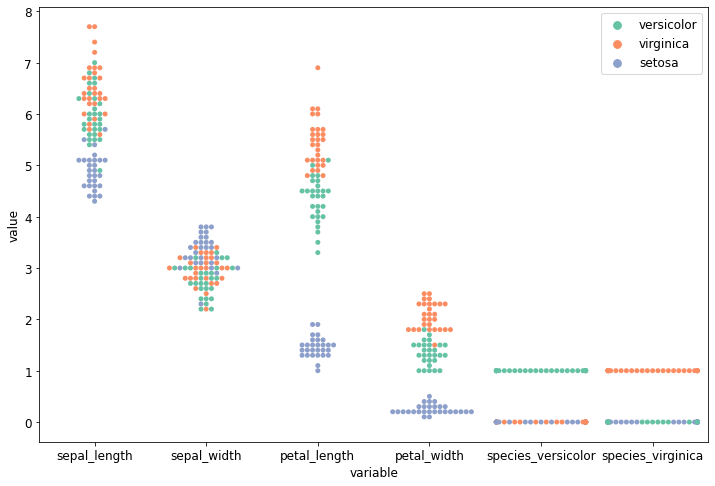

In [15]:
sns.swarmplot(x="variable", y="value", data=melt, hue="species", palette="Set2")
plt.legend()
plt.show()

**3. Create 4 subplots (2 rows x 2 columns) of scatterplots.**

* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length

**What are your takeaways?**



In [16]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

ValueError: Unrecognized character e in format string

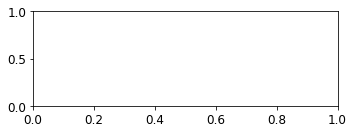

In [17]:
# plot the first subplot
plt.subplot(4,2,1)
plt.plot('sepal_length', 'sepal_width')
plt.title('Sepal Length v. Width')

# the second subplot
plt.subplot(4,2,2)
plt.plot('petal_length', 'petal_width')
plt.title('Petal Length v. Width')

# the third subplot
plt.subplot(4,2,3)
plt.plot('sepal_area', 'petal_area')
plt.title('Comparison of Sepal & Petal Areas')

# the fourth subplot
plt.subplot(4,2,4)
plt.plot('sepal_length', 'petal_length')
plt.title('Comparison of Sepal & Petal Lengths')

plt.suptitle('Comparison of Iris Species')

plt.show()

**4.  Create a heatmap of each variable layering correlation coefficient on top.**



<AxesSubplot:>

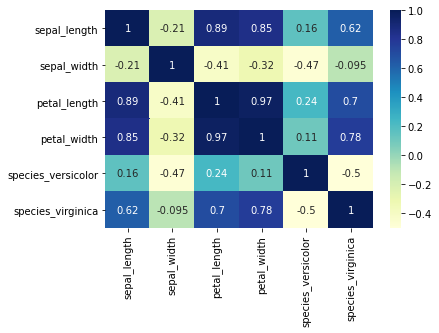

In [18]:
# crosstab = pd.crosstab(train.sepal_width, train.sepal_length, margins=True, normalize=True)
# sns.heatmap(crosstab, cmap = 'YlGnBu')
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')

**5.  Create a scatter matrix visualizing the interaction of each variable.**



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

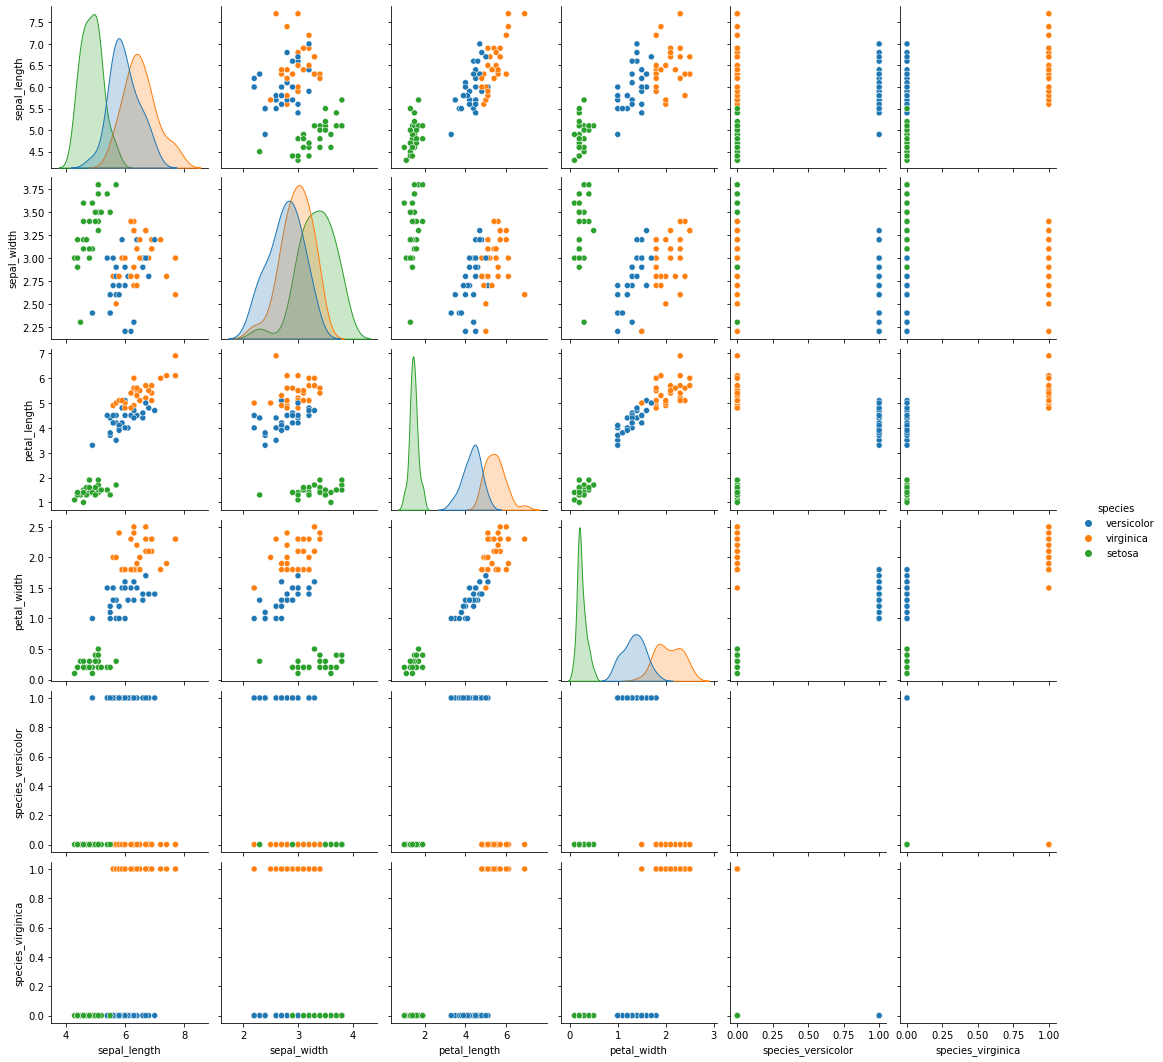

In [24]:
sns.pairplot(data = train, hue = 'species')


**6.  Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.**

**Make sure to include a null hypothesis, alternative hypothesis, results, and summary.**



**What is your takeaway from this statistical testing?**



**7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.**